# Práctica_02
##Visualización de los datos

In [23]:
import pandas as pd
import numpy as np
import pandas_profiling as pdprof
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Leeremos la base de datos
df = pd.read_csv("C:\\Users\\Lizee\\Desktop\\MineriaDatos\\Practica_02\\winemag-data_first150k.csv")

In [3]:
#Veamos el nombre de cada columna
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [4]:
#Verifiquemos el tipo de dato por columna
df.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [5]:
#Verifiquemos si existen nulos
df.isnull().any()

Unnamed: 0     False
country         True
description    False
designation     True
points         False
price           True
province        True
region_1        True
region_2        True
variety        False
winery         False
dtype: bool

In [8]:
#Veamos los primeros registros
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


##Dar una descripcion estadistica basica (la primer parte de la practica, medias, covarianza, desviacion estandar, etc) de los datos de las columnas que a tu criterio ayudaran a entender mejor tus datos.

In [12]:
#Calcularemos el promedio de la columna "Points"
df['points'].mean()

87.8884184721394

In [13]:
#Ahora calcularemos el promedio de la columna "Price"
df['price'].mean()

33.13148249353299

In [14]:
#Calculemos la correlación y concentrémonos en "Points" y "Price"
df.corr()

,Unnamed: 0,points,price
Unnamed: 0,1.000000,-0.094197,-0.036687
points,-0.094197,1.000000,0.459863
price,-0.036687,0.459863,1.000000


In [15]:
#Calculemos la covarianza y concentrémonos en "Points" y "Price"
df.cov()

,Unnamed: 0,points,price
Unnamed: 0,1.898335e+09,-13225.241176,-58456.549452
points,-1.322524e+04,10.383809,53.813033
price,-5.845655e+04,53.813033,1319.326636


##Utilizar al menos dos formas de graficar con matplotlib y dos de seaborn para iniciar un analisis estadistico. (En total son 4 graficas las que tienen que hacer).

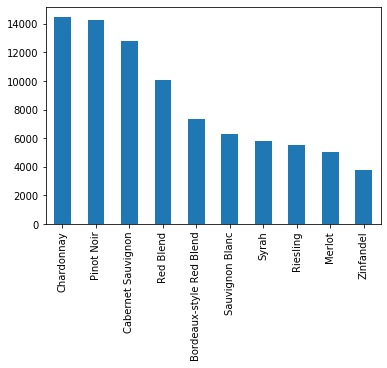

In [28]:
df['variety'].value_counts().head(10).plot.bar()

##De los primeros 10 elementos, en la gráfica de barras podemos observar que hay más variedad de vinos Chardonnay.

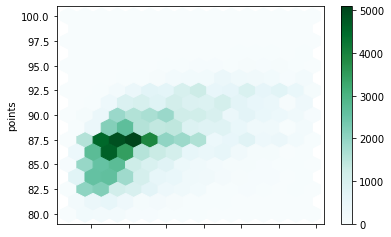

In [88]:
df[df['price'] < 70].plot.hexbin(x='price', y='points', gridsize=15)

##De la gráfica hexagonal podemos deducir que, efectivamente, entre más caro sea la variedad de vino, mejor puntuación tendrá.

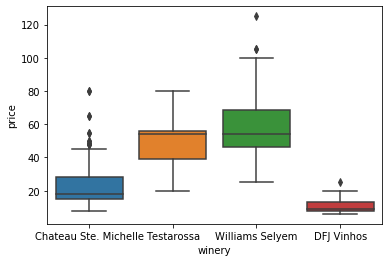

In [90]:
df = df[df.winery.isin(df.winery.value_counts().head(4).index)]

sns.boxplot(
    x='winery',
    y='price',
    data=df
)

##De la gráfica box plot podemos ver que los datos son asimétricos y contienen, al menos la primera caja, muchos valores atípicos. Supongo sucedió esto porque el precio de un mismo vino varia por venderse en distintas tiendas.

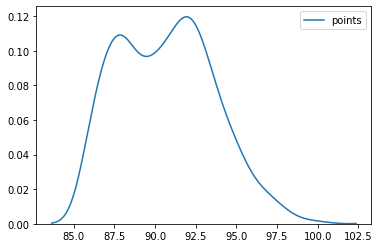

In [102]:
sns.kdeplot(df.query('points > 85').points)

##De la gráfica de líneas podemos ver que un 12% de los vinos tiene una calificación entre 90 y 95 puntos, y como un 11% de los vinos tiene una calificación entre 85 y 87 puntos.